In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from sklearn.decomposition import PCA

In [7]:
data = np.load('../y_smp_train.npy')

In [8]:
pars = np.load('../pars_smp_train.npy')

In [9]:
data.shape

(1000000, 200, 3)

In [10]:
pars.shape

(1000000, 15, 1)

In [20]:
data[0]

array([[ 1.14232967,  0.8743082 ,  1.44608981],
       [-0.48404038,  0.61936718,  1.1793994 ],
       [ 0.66575019,  0.67293175,  1.14851425],
       [ 0.58320887,  0.70243386,  1.18595872],
       [ 2.08442578,  0.78546524,  1.53035258],
       [ 0.40156107,  0.79063341,  1.5246075 ],
       [ 0.16832701,  0.80362424,  1.43133423],
       [-0.45414267,  0.9105709 ,  1.4667741 ],
       [ 0.47847043,  0.82287238,  1.59309717],
       [ 0.43812222,  0.71024841,  1.42655248],
       [-0.1697961 ,  0.53885673,  1.15439917],
       [ 0.44012284,  0.63238205,  1.19122225],
       [-0.35095048,  0.6401296 ,  1.12756885],
       [ 0.53796555,  0.61194021,  1.29163476],
       [ 0.35984426,  0.57352652,  1.23705799],
       [ 1.21439562,  0.82606791,  1.53890334],
       [-0.27180404,  0.8647934 ,  1.48013047],
       [-0.41884704,  0.83945156,  1.38527051],
       [ 0.83883772,  0.97438594,  1.61587892],
       [ 1.48549353,  0.95774599,  1.7857263 ],
       [ 0.4482016 ,  0.88840251,  1.680

In [21]:
data[1]

array([[ 4.85903742e+00,  3.23126495e+00,  2.90209578e+00],
       [-7.29039441e+00, -5.05621154e+00,  1.33229062e+00],
       [ 3.07779613e+00, -2.77816895e+00,  6.47320387e-01],
       [ 2.58530270e+00,  1.03245509e+00,  8.59659375e-01],
       [-3.25319918e+00, -2.05405612e+00,  3.11890348e-01],
       [ 3.15543139e+00,  1.46636372e+00,  6.63035874e-01],
       [-1.11951868e+00,  8.47127120e-01,  7.04806745e-01],
       [ 5.99297392e+00,  6.73171783e+00,  2.20743558e+00],
       [-3.20383512e+00,  2.46581668e+00,  2.40820784e+00],
       [-4.46538318e+00, -4.33606082e+00,  1.01326881e+00],
       [-4.40603165e+00, -9.60570630e+00, -1.28222003e+00],
       [ 7.70139472e-01, -6.91652670e+00, -2.59207985e+00],
       [-3.70101449e+00, -6.76090624e+00, -3.66168325e+00],
       [-3.81166306e+00, -6.49122356e+00, -4.54795981e+00],
       [-5.94445974e+00, -8.18229067e+00, -5.71382475e+00],
       [ 1.44922390e-01, -2.58539006e+00, -5.32779300e+00],
       [-2.44835895e+00,  4.39352217e-01

In [23]:
df = pd.DataFrame(data[1])

In [24]:
pca = PCA(n_components=3)

In [25]:
df_pca = pca.fit_transform(df)

In [26]:
df_pca = pd.DataFrame(df_pca)

<Axes: >

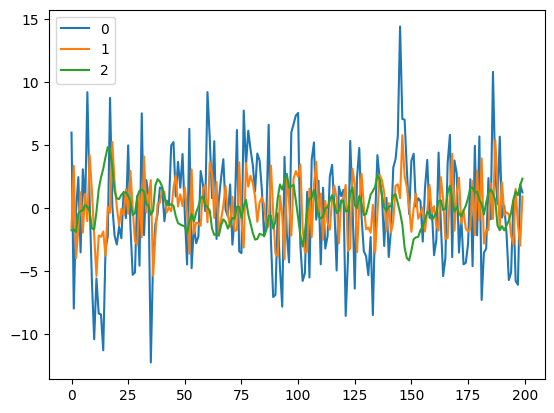

In [27]:
df_pca.plot()

<Axes: >

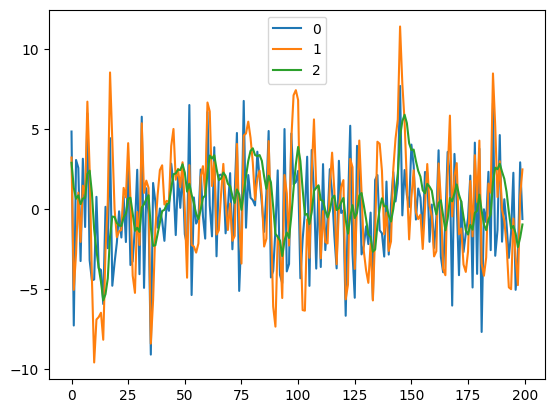

In [28]:
df.plot()

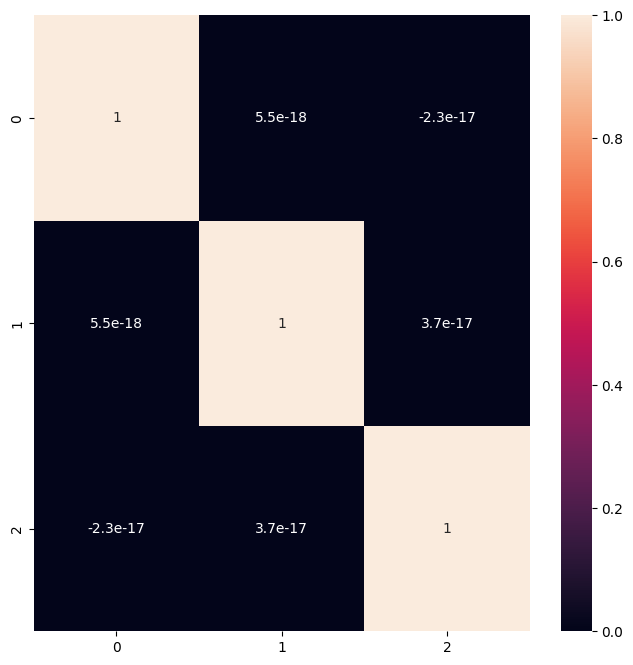

In [29]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df_pca.corr(), annot = True, fmt='.2g');

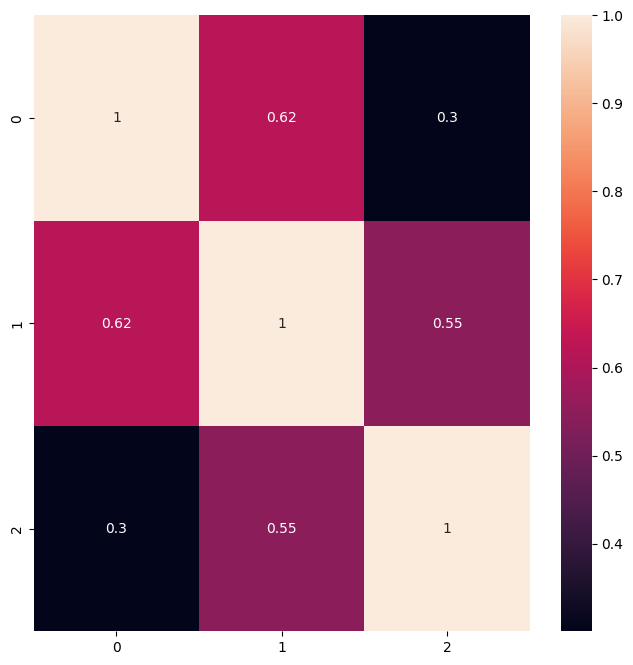

In [30]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot = True, fmt='.2g');

In [31]:
a = data[0]
b = data[1]
c = data[2]
d = data[3]

a = pd.DataFrame(a)
b = pd.DataFrame(b)
c = pd.DataFrame(c)
d = pd.DataFrame(d)

<Axes: >

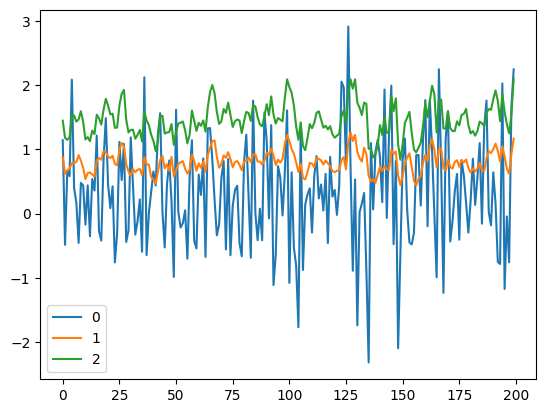

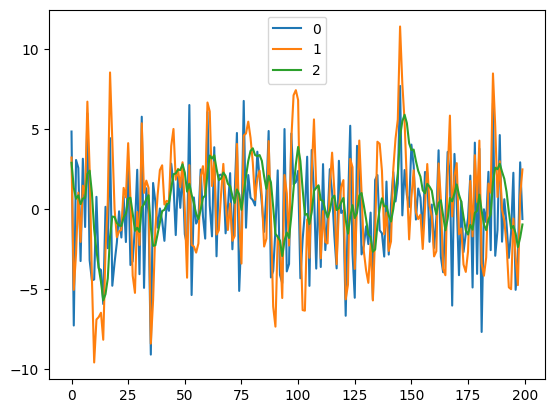

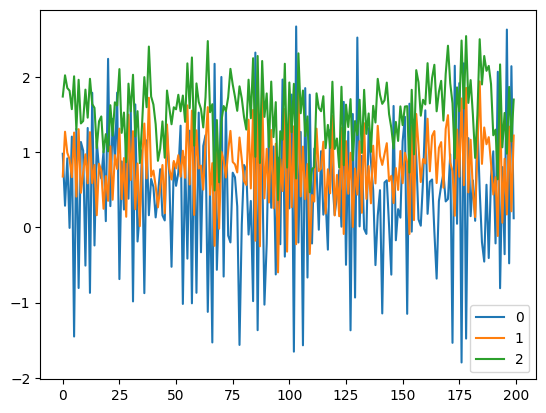

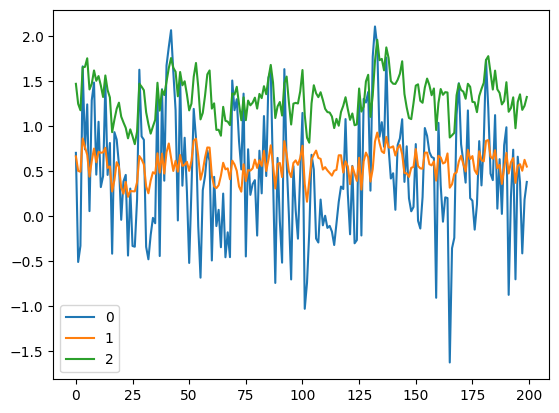

In [32]:
a.plot()
b.plot()
c.plot()
d.plot()

In [33]:
df = data[0]
df = pd.DataFrame(df)

In [34]:
df

,0,1,2
0,1.142330,0.874308,1.446090
1,-0.484040,0.619367,1.179399
2,0.665750,0.672932,1.148514
3,0.583209,0.702434,1.185959
4,2.084426,0.785465,1.530353
...,...,...,...
195,-1.170654,0.886007,1.576825
196,-0.042919,0.699045,1.392718
197,-0.756649,0.621691,1.248129
198,1.665564,0.925140,1.539656


In [35]:
df.shape

(200, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [37]:
# Вывести первые несколько строк данных
df.head()

,0,1,2
0,1.142330,0.874308,1.446090
1,-0.484040,0.619367,1.179399
2,0.665750,0.672932,1.148514
3,0.583209,0.702434,1.185959
4,2.084426,0.785465,1.530353


In [38]:
# сортируем индексы и проверяем их порядок
df = df.sort_index()
df.index.is_monotonic_increasing

True

In [39]:
# Описательная статистика временного ряда
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.332218,0.798763,1.447000
std,0.866278,0.161148,0.254127
min,-2.314169,0.440288,0.837562
25%,-0.295557,0.681079,1.270128
50%,0.326336,0.796133,1.432526
75%,0.855967,0.897087,1.591414
max,2.911078,1.264991,2.099138


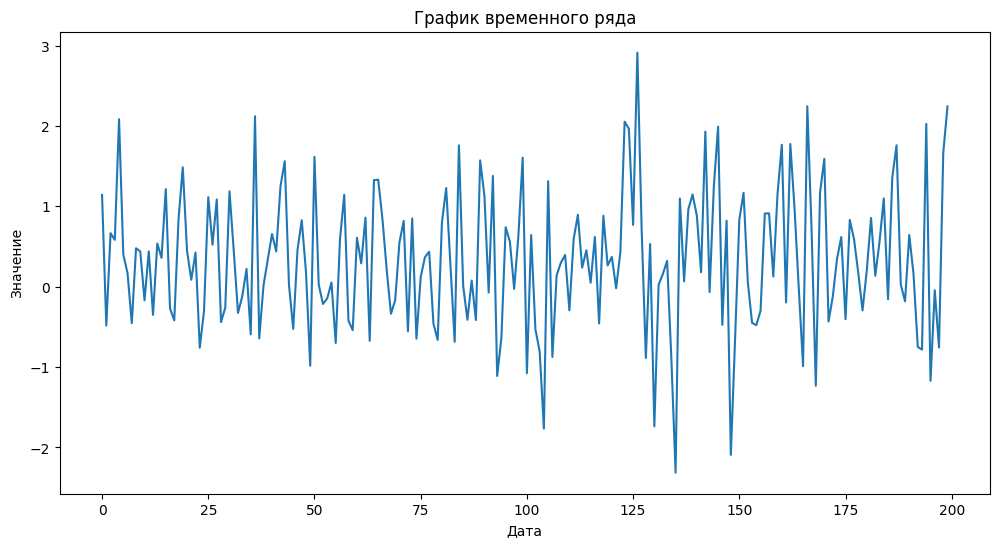

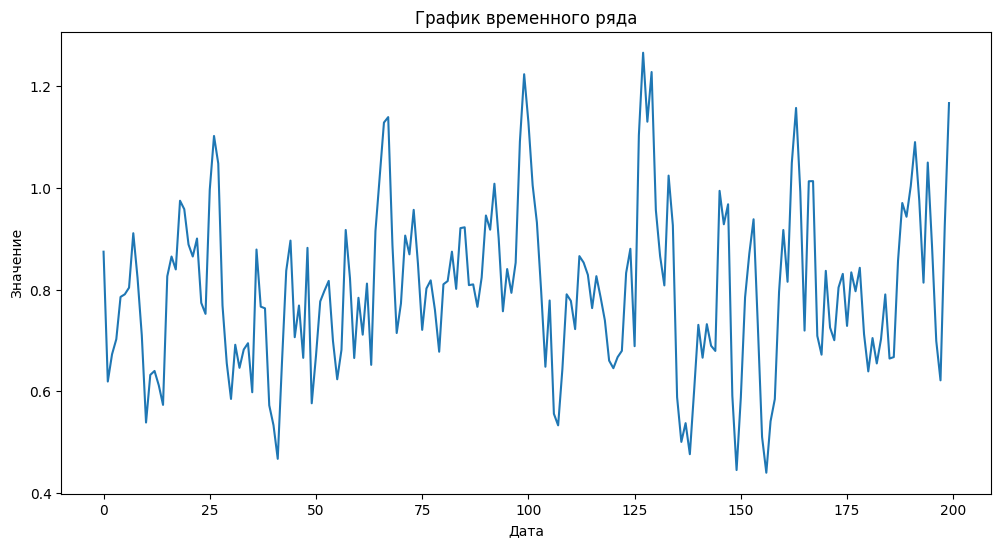

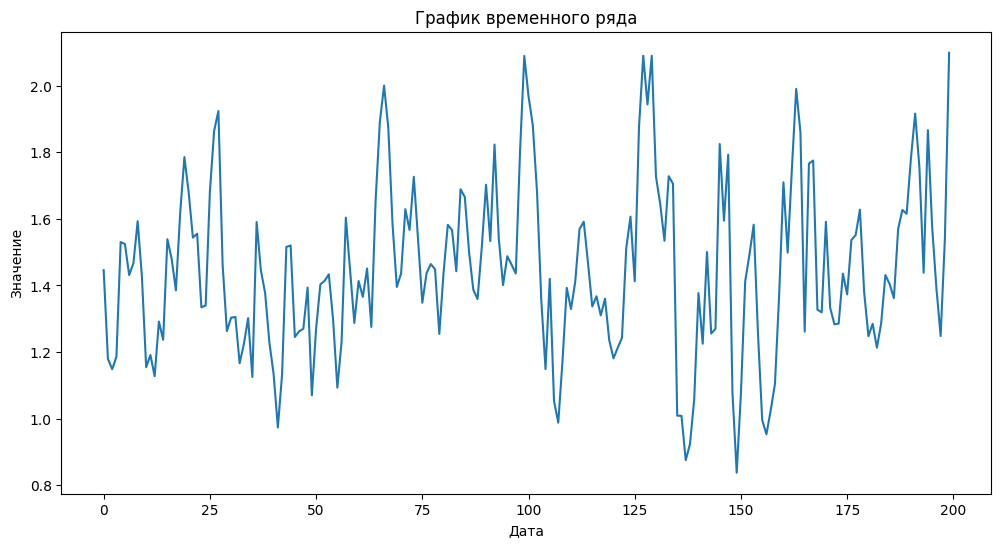

In [40]:
# График временного ряда
for i in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[i])
    plt.title('График временного ряда')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()

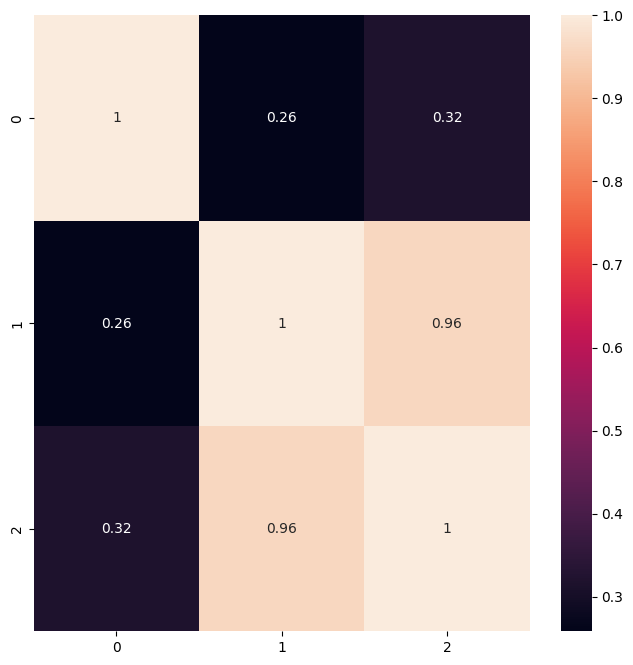

In [41]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot = True, fmt='.2g');

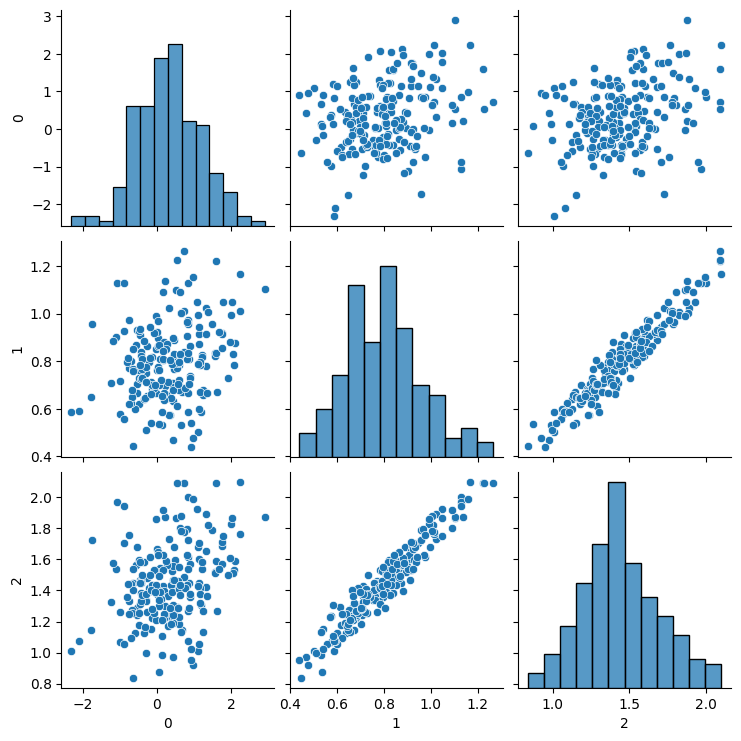

In [42]:
# Pairplot
features = df.columns
sns.pairplot(df.reset_index()[features]);

C:\Users\wilte\AppData\Local\Temp\ipykernel_3420\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


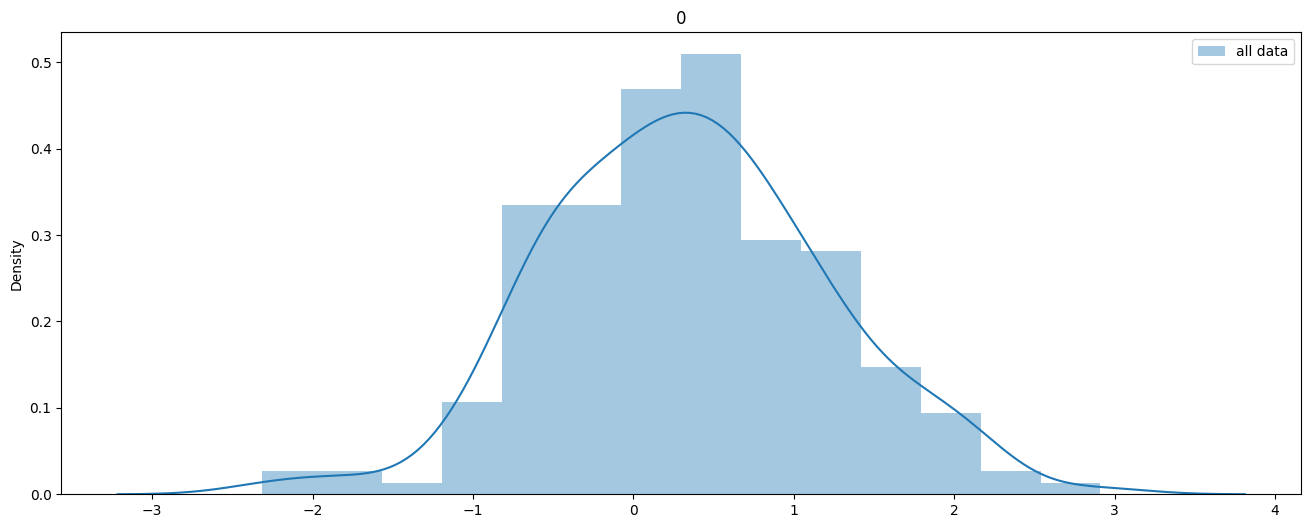

C:\Users\wilte\AppData\Local\Temp\ipykernel_3420\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


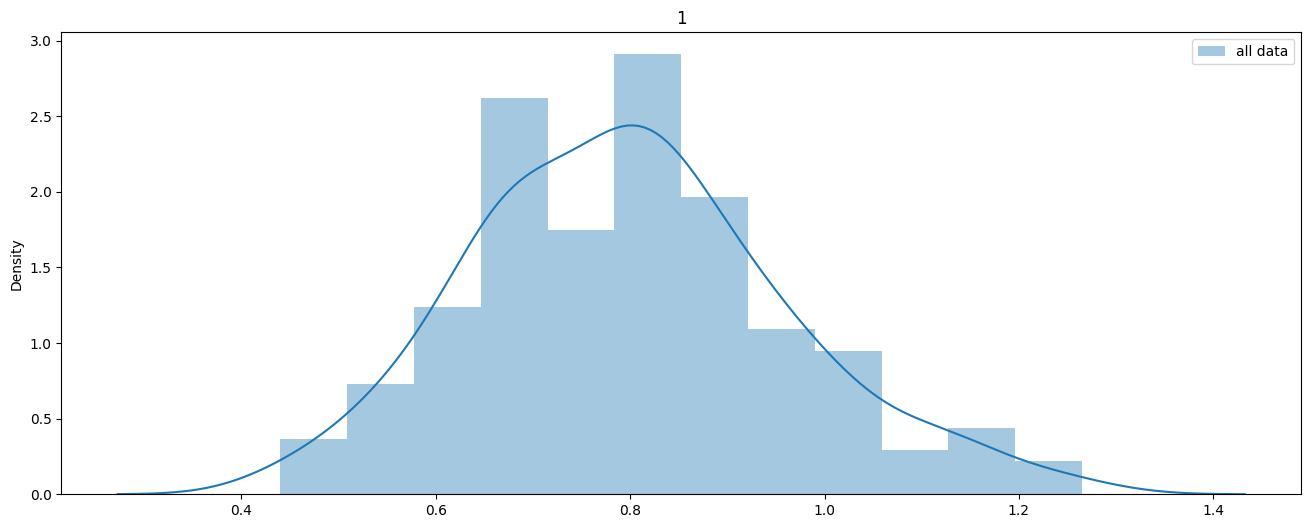

C:\Users\wilte\AppData\Local\Temp\ipykernel_3420\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


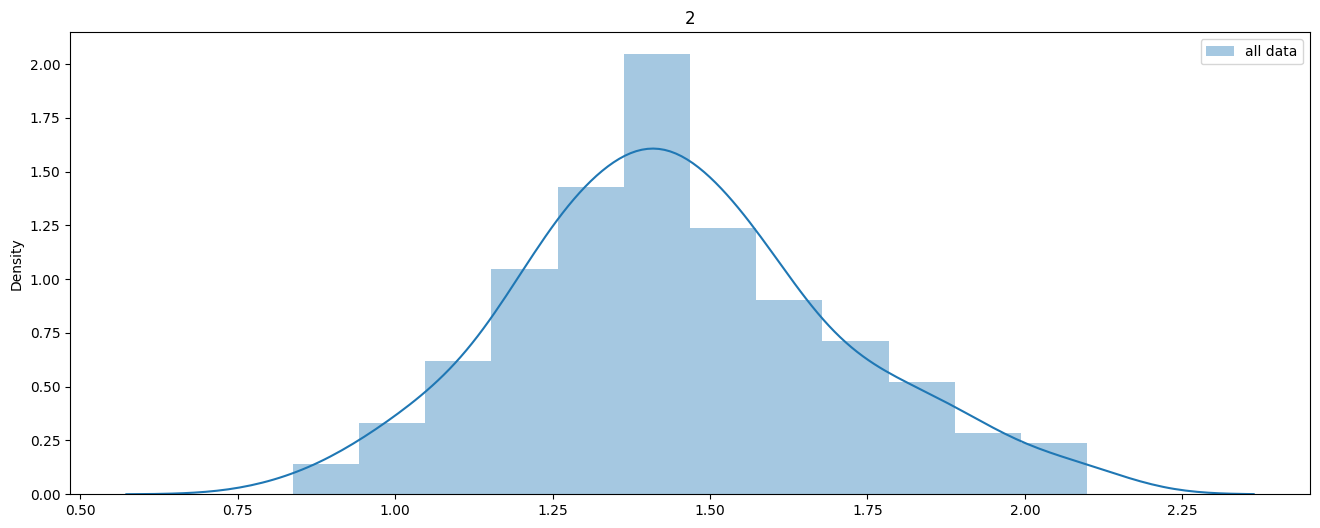

In [43]:
# Distribution plot
bins = None
for col in features:
    plt.figure(figsize=(16, 6))
    sns.distplot(df[col].values,bins=bins,label='all data') #without gaps  
    plt.title(col)
    plt.legend()
    plt.show()

In [75]:

%matplotlib inline
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                             'p-value', 
                                             '#Lags Used', 
                                             'Number of Observations Used'])
    
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [76]:
test_stationarity(df[0])

Results of Dickey-Fuller Test:
Test Statistic                -1.438645e+01
p-value                        8.973082e-27
#Lags Used                     0.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.438645e+01
p-value                        8.973082e-27
#Lags Used                     0.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


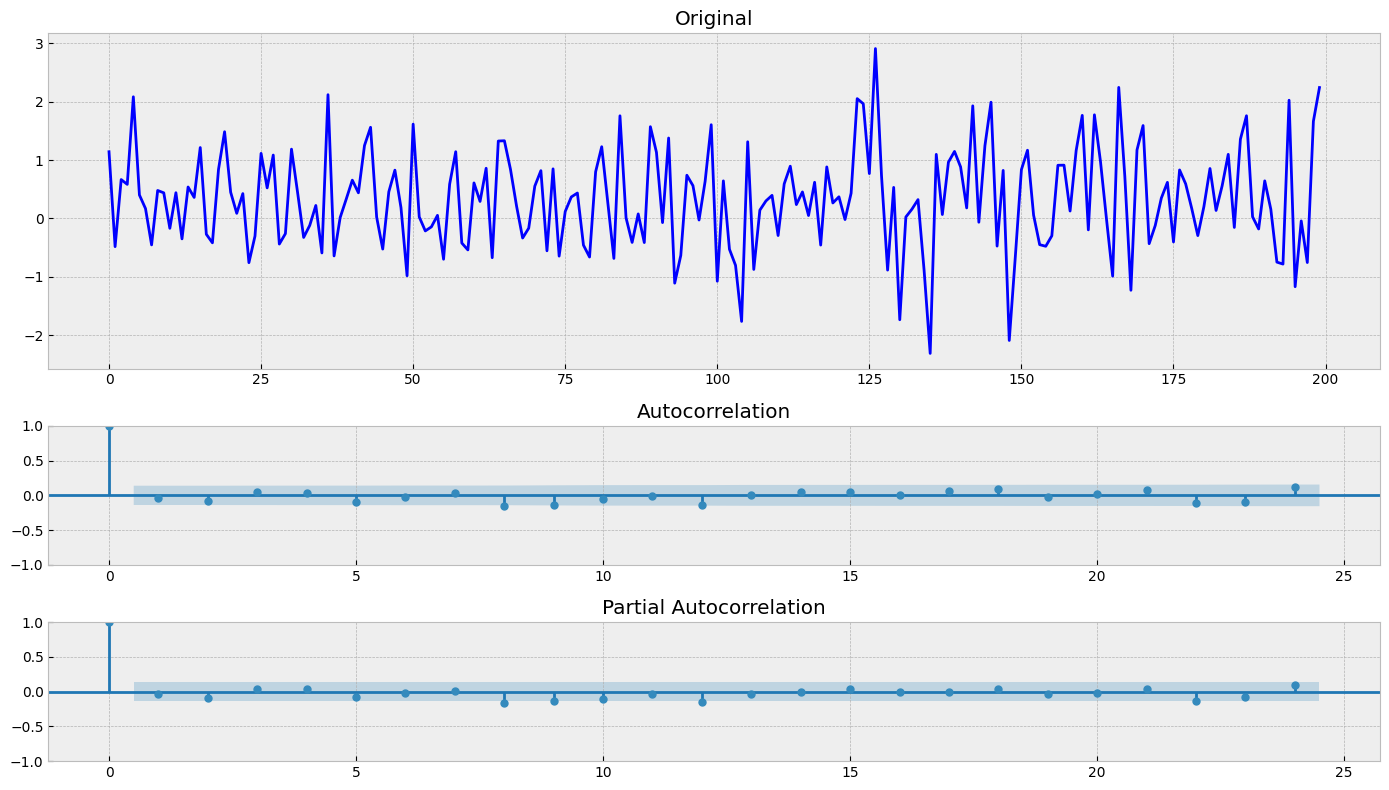

In [77]:
tsplot(df[0])

In [78]:
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

<Axes: >

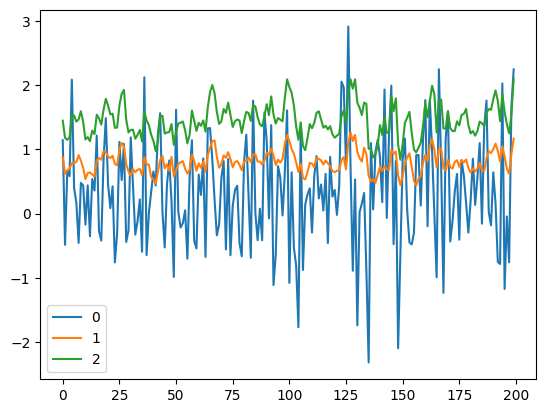

In [79]:
df.plot()

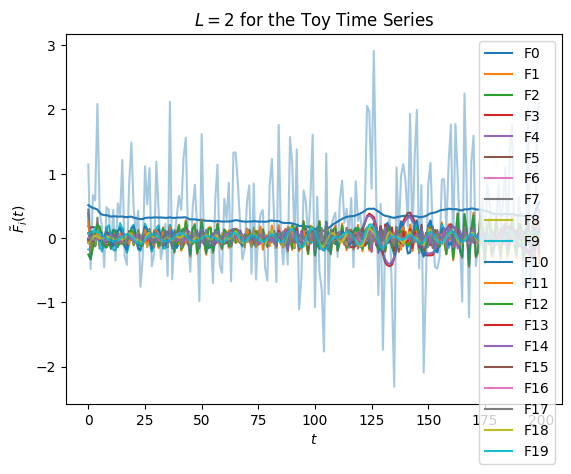

In [83]:
F_ssa_L2 = SSA(df[0], 20)
F_ssa_L2.components_to_df().plot()
F_ssa_L2.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=2$ for the Toy Time Series");

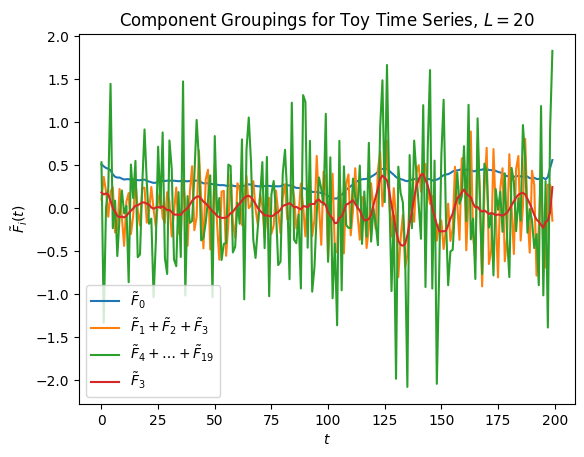

In [84]:
F_ssa_L2.reconstruct(0).plot()
F_ssa_L2.reconstruct([1,2,3]).plot()
F_ssa_L2.reconstruct(slice(4,20)).plot()
F_ssa_L2.reconstruct(3).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Toy Time Series, $L=20$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2+\tilde{F}_3$", 
            r"$\tilde{F}_4+ \ldots + \tilde{F}_{19}$",
            r"$\tilde{F}_3$"]);